# Random Forest Classification

Random forest classification is a modified tree learning algorithm.

Hyperparameters:

- Number of trees used
- number of features
- number of samples --> default of which is the training set

In [4]:
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the data up from file and reading the beginning
print("Loading data...")
data = pd.read_csv("C:\\btc_usd.csv")
print("Data loaded successfully")
print(data.head())

Loading data...
Data loaded successfully
                        Date        Open        High         Low       Close  \
0  2014-09-17 00:00:00+00:00  465.864014  468.174011  452.421997  457.334015   
1  2014-09-18 00:00:00+00:00  456.859985  456.859985  413.104004  424.440002   
2  2014-09-19 00:00:00+00:00  424.102997  427.834991  384.532013  394.795990   
3  2014-09-20 00:00:00+00:00  394.673004  423.295990  389.882996  408.903992   
4  2014-09-21 00:00:00+00:00  408.084991  412.425995  393.181000  398.821014   

     Volume  Dividends  Stock Splits  
0  21056800        0.0           0.0  
1  34483200        0.0           0.0  
2  37919700        0.0           0.0  
3  36863600        0.0           0.0  
4  26580100        0.0           0.0  


In [5]:
# Convert 'Date' to datetime with timezone information preserved
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# error check
print("Rows with invalid date format:", data['Date'].isna().sum())

# Set 'Date' as the index
data.set_index("Date", inplace=True)

# percentage change
data['Percentage_Change'] = data['Close'].pct_change()
data['Target'] = np.sign(data['Percentage_Change']).shift(-1)
data.dropna(inplace=True) # removes missing values that occur
# 1 for positive, -1 for negative 
data['Label'] = 0
data.loc[data['Percentage_Change'] > 0, 'Label'] = 1
data.loc[data['Percentage_Change'] < 0, 'Label'] = -1

# Features and the target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]
y = data['Label']

Rows with invalid date format: 0


In [6]:
#Split the data into training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rand_Forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rand_Forest.fit(X_train, y_train)

y_pred = rand_Forest.predict(X_test)

The accuracy of the model is:  0.7627345844504021


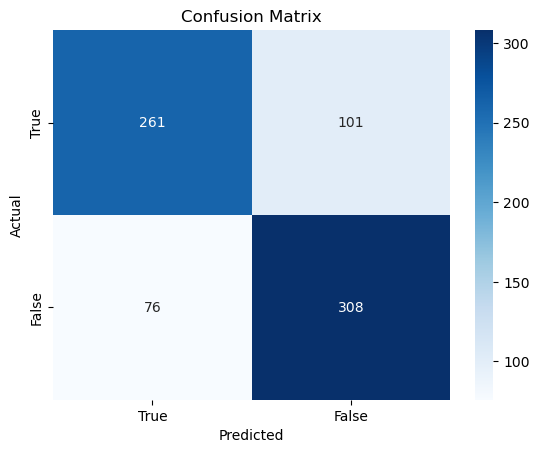

In [7]:
# Accuracy score
print("The accuracy of the model is: ", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Comments

Forest Classification uses columns from Date to Close as the last two columns Dividends and Stock splits have no data.

The model comes out with majority being true on both accounts and false on both accounts.

Fit classifier to the training data